## Importing the Neccessary Libraries

In [1]:
# supresses future warnings 

import warnings                                                 
warnings.simplefilter(action='ignore')

# importing Datetime for timeseries data

import datetime as dt
from datetime import datetime, timedelta

# Importing Maplotlib for Visualiztion

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Importing Math and Numpy for Calculations

import math
from math import sqrt

# Importing Numpy for calculations

import numpy as np

## For datarame importing

import pandas as pd
import copy
import itertools

## Importing tensorflow for model creation

import tensorflow as tf
from past.builtins import xrange
import tensorflow.compat.v1 as v1
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.nn.init import xavier_uniform_ as init
from torch.autograd import Variable
import numpy as np

#### Data Pre-Processing

In [2]:
## Importing the dowloaded datasets

m= pd.read_csv(r'DrDoS_DNS.csv')
m0= pd.read_csv(r'DrDoS_LDAP.csv')
m1= pd.read_csv(r'DrDoS_MSSQL.csv')
m2= pd.read_csv(r'DrDoS_NetBIOS.csv')
m3= pd.read_csv(r'DrDoS_NTP.csv')
m4= pd.read_csv(r'DrDoS_SNMP.csv')
m5= pd.read_csv(r'DrDoS_SSDP.csv')
m6= pd.read_csv(r'DrDoS_UDP.csv')
m7= pd.read_csv(r'Syn.csv')
m8= pd.read_csv(r'TFTP.csv')
m9= pd.read_csv(r'UDPLag.csv')

In [3]:
## Printing the Overview of one sample data
m

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074408,6364,172.16.0.5-192.168.50.1-900-23579-17,172.16.0.5,900,192.168.50.1,23579,17,2018-12-01 11:22:40.253588,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
5074409,5576,172.16.0.5-192.168.50.1-900-54596-17,172.16.0.5,900,192.168.50.1,54596,17,2018-12-01 11:22:40.253659,30,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
5074410,26506,172.16.0.5-192.168.50.1-900-14341-17,172.16.0.5,900,192.168.50.1,14341,17,2018-12-01 11:22:40.253852,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
5074411,18736,172.16.0.5-192.168.50.1-900-46229-17,172.16.0.5,900,192.168.50.1,46229,17,2018-12-01 11:22:40.254534,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [3]:
### Converting the 'Time Stamp' Column from object to data time type
m0[' Timestamp'] =  pd.to_datetime(m0[' Timestamp'])
m[' Timestamp'] =  pd.to_datetime(m[' Timestamp'])
m1[' Timestamp'] =  pd.to_datetime(m1[' Timestamp'])
m2[' Timestamp'] =  pd.to_datetime(m2[' Timestamp'])
m3[' Timestamp'] =  pd.to_datetime(m3[' Timestamp'])
m4[' Timestamp'] =  pd.to_datetime(m4[' Timestamp'])
m5[' Timestamp'] =  pd.to_datetime(m5[' Timestamp'])
m6[' Timestamp'] =  pd.to_datetime(m6[' Timestamp'])
m7[' Timestamp'] =  pd.to_datetime(m7[' Timestamp'])
m8[' Timestamp'] =  pd.to_datetime(m8[' Timestamp'])
m9[' Timestamp'] =  pd.to_datetime(m9[' Timestamp'])

In [5]:
### Setting the Index for all of them

m.set_index(' Timestamp',inplace= True)
m0.set_index(' Timestamp', inplace = True)
m1.set_index(' Timestamp',inplace= True)
m2.set_index(' Timestamp', inplace = True)
m3.set_index(' Timestamp',inplace= True)
m4.set_index(' Timestamp', inplace = True)
m5.set_index(' Timestamp',inplace= True)
m6.set_index(' Timestamp', inplace = True)
m7.set_index(' Timestamp',inplace= True)
m8.set_index(' Timestamp', inplace = True)
m9.set_index(' Timestamp', inplace = True)

In [6]:
## Group all the dataframes into the one based on 'Time Stamp'
import pandas as pd
from functools import reduce

# Convert all indexes to datetime
for df in [m,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9]:
    df.index = pd.to_datetime(df.index)

# Perform as-of merges
res = reduce(lambda left, right:
             pd.merge_asof(left, right, left_index=True, right_index=True),
             [m , m0,m1,m2,m3,m4,m5,m6,m7,m8,m9])

print(res)

                            Unnamed: 0_x  \
 Timestamp                                 
2018-12-01 10:51:39.813448           425   
2018-12-01 10:51:39.820842           430   
2018-12-01 10:51:39.852499          1654   
2018-12-01 10:51:39.890213          2927   
2018-12-01 10:51:39.941151           694   
...                                  ...   
2018-12-01 11:22:40.253588          6364   
2018-12-01 11:22:40.253659          5576   
2018-12-01 11:22:40.253852         26506   
2018-12-01 11:22:40.254534         18736   
2018-12-01 11:22:40.254719          2811   

                                                       Flow ID_x  \
 Timestamp                                                         
2018-12-01 10:51:39.813448  172.16.0.5-192.168.50.1-634-60495-17   
2018-12-01 10:51:39.820842  172.16.0.5-192.168.50.1-60495-634-17   
2018-12-01 10:51:39.852499  172.16.0.5-192.168.50.1-634-46391-17   
2018-12-01 10:51:39.890213  172.16.0.5-192.168.50.1-634-11894-17   
2018-12-01 10:51:39

In [7]:
## Filling the Missing Values with 0's 
res.fillna(0,inplace = True)

In [8]:
## Printing the Overview of Final Data

res

,Unnamed: 0_x,Flow ID_x,Source IP_x,Source Port_x,Destination IP_x,Destination Port_x,Protocol_x,Flow Duration_x,Total Fwd Packets_x,Total Backward Packets_x,...,Active Std_y,Active Max_y,Active Min_y,Idle Mean_y,Idle Std_y,Idle Max_y,Idle Min_y,SimillarHTTP_y,Inbound_y,Label_y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-01 10:51:39.813448,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 10:51:39.820842,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 10:51:39.852499,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 10:51:39.890213,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 10:51:39.941151,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01 11:22:40.253588,6364,172.16.0.5-192.168.50.1-900-23579-17,172.16.0.5,900,192.168.50.1,23579,17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 11:22:40.253659,5576,172.16.0.5-192.168.50.1-900-54596-17,172.16.0.5,900,192.168.50.1,54596,17,30,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2018-12-01 11:22:40.253852,26506,172.16.0.5-192.168.50.1-900-14341-17,172.16.0.5,900,192.168.50.1,14341,17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [9]:
## Checking the data shape

res.shape

(5074413, 174)

### CapsNet routing algorithm

In [11]:
## Setting the Metrics for model 
BATCH_SIZE=128
EPOCHS=20
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [29]:
# split into train and test sets
train_size = int(len(res) * 0.9)
test_size =  train_size
train = res[5073500:len(res)]
test = res[5073600:len(res)]
print(len(train), len(test))

913 813


In [32]:
## making the training data out of orignial dataframe

training_set = train.iloc[:].values
X_train = []
y_train = []
for i in range(784, training_set.shape[0]):
    X_train.append(training_set[i-784:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

## making the testing data out of orignial dataframe

testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(784, testing_set.shape[0]):
    X_test.append(testing_set[i-784:i,0])
    y_test.append(testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

## Reshaping the demension of X varaible from 784 to 28*28


X_train =  X_train.reshape(len(X_train), 28*28).astype('float32') 
X_test =  X_test.reshape(len(X_test), 28*28).astype('float32') 


# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(X_train, [-1, 1, 28, 28])

x_test = np.reshape(X_test, [-1, 1 , 28, 28])

In [33]:
## Checking the shape
print (x_train.shape)
print (x_test.shape)

(129, 1, 28, 28)
(29, 1, 28, 28)


In [92]:
## Comprising them together
train_loader = x_train, y_train
test_loader = x_test , y_test

In [55]:
x_test = torch.tensor(imgs[:500],device=DEVICE,dtype=torch.float)
# x_test = x_test.view(x_test.size(0),1, x_test.size(1),x_test.size(2))
y_test = torch.tensor(labels[:500],device=DEVICE,dtype=torch.long)


print(x_test.shape, y_test.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [34]:
## Squash

epsilon = 0.00000001
def squash(x):
    # not concern batch_size, maybe rewrite
    s_squared_norm = torch.sum(x*x,1,keepdim=True) + epsilon
    scale = torch.sqrt(s_squared_norm)/(1. + s_squared_norm)
    # out = (batch_size,1,10)*(batch_size,16,10) = (batch_size,16,10)
    out = scale * x
    return out

In [35]:
## Capsule


class Capsule(nn.Module):

    def __init__(self, in_units,in_channels, num_capsule, dim_capsule, routings=3, **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.in_units = in_units
        self.in_channels = in_channels
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        # (in_units,10,128,16)
        self.W = nn.Parameter((torch.randn(self.in_units,self.num_capsule,self.in_channels, self.dim_capsule)))

    def forward(self, u_vecs):
        u_vecs = u_vecs.permute(0,2,1)
        u_vecs = u_vecs.unsqueeze(2)
        u_vecs = u_vecs.unsqueeze(2)

        
        # (batch_size,in_units,1,1,in_channels)*(in_units,10,in_channels,16) = (batch_size,in_units,10,1,16)
        u_hat_vecs = torch.matmul(u_vecs,self.W)
        # (batch_size,in_units,10,16)
        u_hat_vecs = u_hat_vecs.permute(0,1,2,4,3).squeeze(4)
        
        # (batch_size,10,in_units,16)
        u_hat_vecs2 = u_hat_vecs.permute(0,2,1,3)
    
        # (batch_size,10,1,in_units)
        b = torch.zeros(u_hat_vecs.size(0),self.num_capsule,1,self.in_units,device=DEVICE)
        for i in range(self.routings):
            # (batch_size,10,1,in_units)
            c = F.softmax(b,-1)
            # s = (batch_size,10,1,in_units)*(batch_size,10,in_units,16) = (batch_size,10,1,16)
            s = torch.matmul(c,u_hat_vecs2)
            # (batch_size,16,10)
            s = s.permute(0,3,1,2).squeeze(3)
            # (batch_size,16,10)
            v = squash(s)
            # here
            # (batch_size,10,16,1)
            v = v.permute(0,2,1).unsqueeze(3)
            # (batch_size,10,in_units,16)*(batch_size,10,16,1) = (batch_size,10,in_units,1)
            sim = torch.matmul(u_hat_vecs2,v)
            # (batch_size,10,1,in_units)
            sim = sim.permute(0,1,3,2)
            b = b+sim
        # (batch_size,16,10)
        return v.permute(0,2,1,3).squeeze(3)

In [36]:
## Decoder


# is_overlap = False
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        
        self.reconstraction_layers = nn.Sequential(
            nn.Linear(16 * 10, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 784),
            nn.Sigmoid()
        )
        
    def forward(self, x,label):
        # x (batch_size,10,16)
        # mask (batch_size,10,1)
        mask = label.unsqueeze(2)

        inp = mask*x
        inp = inp.view(x.size(0), -1)
        reconstructions = self.reconstraction_layers(inp)
        reconstructions = reconstructions.view(-1, 1, 28, 28)
        
        return reconstructions    

In [37]:
## CapsuleNet


class CapsuleNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 1,28x28
        self.conv1=nn.Conv2d(1,256,9) 
        self.conv2=nn.Conv2d(256,32*8,9,2) 
        self.capsule = Capsule(1152,8, 10, 16)
        self.Decoder = Decoder()
   
    def forward(self,x,label):
        batch_size = x.size(0)
        # Conv1
        out = self.conv1(x)
        out = F.relu(out)
        # PrimaryCaps
        out = self.conv2(out)
        # (batch_size, 32*8, 6, 6)
        out = F.relu(out)
        out = out.view(batch_size,8,-1)
        out = squash(out)
        # (batch_size,8,1152)
        out = out.view(out.size(0),out.size(1),-1)
        # Capsule
        # (batch_size,16,10)
        out = self.capsule(out)
        # (batch_size,10,16)
        out = out.permute(0,2,1)
        # Decoder
        decoder = self.Decoder(out,label)

        


        return out,decoder

In [38]:
## Model Summary 

import os
model = CapsuleNet()
if os.path.exists('params.pkl'):
    model.load_state_dict(torch.load('params.pkl'))
    
model.to(DEVICE)

CapsuleNet(
  (conv1): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(256, 256, kernel_size=(9, 9), stride=(2, 2))
  (capsule): Capsule()
  (Decoder): Decoder(
    (reconstraction_layers): Sequential(
      (0): Linear(in_features=160, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)

In [57]:
## train


import time
start = time.process_time()

optimizer = optim.Adam(model.parameters())#, lr=0.000001)

n_epoch = 1
pre_acc = 0
for epoch in range(n_epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        data, target = data.to(DEVICE), target.to(DEVICE)
        
        optimizer.zero_grad()
        
        output,pred_img = model(data,target)
        
        # (batch_size,10)
        output = torch.sqrt(torch.sum(output*output, 2))
        loss1 = target*F.relu(0.9-output)**2 + 0.25*(1-target)*F.relu(output-0.1)**2
        loss1 = loss1.sum(dim=1).mean()
        loss2 = ((data-pred_img)**2).mean()
        loss = loss1+0.0005*loss2
        loss.backward()

        optimizer.step()

        if(batch_idx)%100 == 0:
            y_true = torch.sparse.torch.eye(10).index_select(dim=0, index=y_test.cpu().data)
            y_true = y_true.to(DEVICE)
            predict,_ = model(x_test,y_true)
            predict = torch.sqrt(torch.sum(predict*predict, 2))
            _,pred = torch.max(predict, 1)

            acc = torch.mean((torch.tensor(pred == y_test,dtype=torch.float)))

            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss1: {:.6f} \tLoss2: {:.6f} \t test accuracy:{:.4f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),loss1.item(),loss2.item(),acc))
            

## Processing Time

print(time.process_time() - start)

Train Epoch: 0 [0/60000 (0%)]	Loss1: 0.007851 	Loss2: 0.710556 	 test accuracy:0.9844
Train Epoch: 0 [12800/60000 (21%)]	Loss1: 0.004412 	Loss2: 0.708001 	 test accuracy:0.9844
Train Epoch: 0 [25600/60000 (43%)]	Loss1: 0.008628 	Loss2: 0.708166 	 test accuracy:0.9844
Train Epoch: 0 [38400/60000 (64%)]	Loss1: 0.005160 	Loss2: 0.736252 	 test accuracy:0.9844
Train Epoch: 0 [51200/60000 (85%)]	Loss1: 0.008774 	Loss2: 0.716732 	 test accuracy:0.9844


In [58]:
## Testing Accuracy

test_acc = []
for batch_idx, (data, target) in enumerate(test_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
    y_true = torch.sparse.torch.eye(10).index_select(dim=0, index=target.cpu().data)
    y_true = y_true.to(DEVICE)
    predict,_ = model(data,y_true)
    predict = torch.sqrt(torch.sum(predict*predict, 2))
    _,pred = torch.max(predict, 1)

    acc = torch.mean((torch.tensor(pred == target,dtype=torch.float)))
    test_acc.append(acc)
print('total test accuracy : %.4f'%(np.array(test_acc).mean()))

total test accuracy : 0.9897


In [64]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(target, pred)

array([[2, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [80]:
### TPR, TNR, FPR, FNR 


tn, fp, fn, tp = confusion_matrix(target, pred, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

TNR: 0 FPR :  0 FNR :  0 TPR :  2


In [159]:
# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(model))

Memory Size :  8571469310


In [91]:
from sklearn.metrics import cohen_kappa_score

cohen_score = cohen_kappa_score(target, pred)

print ('cohen_score:',cohen_score)

cohen_score: 0.9276018099547512


## CapsNet model using the Sequential Euclidean Distance Routing Algorithm  

In [128]:
## Decoder

# is_overlap = False
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        
        self.reconstraction_layers = nn.Sequential(
            nn.Linear(16 * 10, 512),
            nn.Softmax(dim=1),
            nn.Linear(512, 1024),
            nn.Softmax(dim=1),
            nn.Linear(1024, 784),
            nn.Sigmoid()
        )
        
    def forward(self, x,label):
        # x (batch_size,10,16)
        # mask (batch_size,10,1)
        mask = label.unsqueeze(2)

        inp = mask*x
        inp = inp.view(x.size(0), -1)
        reconstructions = self.reconstraction_layers(inp)
        reconstructions = reconstructions.view(-1, 1, 28, 28)
        
        return reconstructions    

In [131]:
## CapsuleNet

class CapsuleNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 1,28x28
        self.conv1=nn.Conv2d(1,256,9) 
        self.conv2=nn.Conv2d(256,32*8,9,2) 
        self.capsule = Capsule(1152,8, 10, 16)
        self.Decoder = Decoder()
   
    def forward(self,x,label):
        batch_size = x.size(0)
        # Conv1
        out = self.conv1(x)
        out = F.relu(out)
        # PrimaryCaps
        out = self.conv2(out)
        # (batch_size, 32*8, 6, 6)
        out = F.relu(out)
        out = out.view(batch_size,8,-1)
        out = squash(out)
        # (batch_size,8,1152)
        out = out.view(out.size(0),out.size(1),-1)
        # Capsule
        # (batch_size,16,10)
        out = self.capsule(out)
        # (batch_size,10,16)
        out = out.permute(0,2,1)
        # Decoder
        decoder = self.Decoder(out,label)

        


        return out,decoder

In [132]:
### Model Summary

import os
model = CapsuleNet()

    
model.to(DEVICE)

CapsuleNet(
  (conv1): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(256, 256, kernel_size=(9, 9), stride=(2, 2))
  (capsule): Capsule()
  (Decoder): Decoder(
    (reconstraction_layers): Sequential(
      (0): Linear(in_features=160, out_features=512, bias=True)
      (1): Softmax(dim=1)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): Softmax(dim=1)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)

In [135]:
##  Training the Model
import time
start = time.process_time()

optimizer = optim.Adam(model.parameters())#, lr=0.000001)

n_epoch = 1
pre_acc = 0
for epoch in range(n_epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        data, target = data.to(DEVICE), target.to(DEVICE)
        
        optimizer.zero_grad()
        
        output,pred_img = model(data,target)
        
        # (batch_size,10)
        output = torch.sqrt(torch.sum(output*output, 2))
        loss1 = target*F.softmax(0.9-output)**2 + 0.25*(1-target)*F.softmax(output-0.1)**2
        loss1 = loss1.sum(dim=1).mean()
        loss2 = ((data-pred_img)**2).mean()
        loss = loss1+0.005*loss2
        loss.backward()

        optimizer.step()

        if(batch_idx)%100 == 0:
            y_true = torch.sparse.torch.eye(10).index_select(dim=0, index=y_test.cpu().data)
            y_true = y_true.to(DEVICE)
            predict,_ = model(x_test,y_true)
            predict = torch.sqrt(torch.sum(predict*predict, 2))
            _,pred = torch.max(predict, 1)

            acc = torch.mean((torch.tensor(pred == y_test,dtype=torch.float)))

            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss1: {:.6f} \tLoss2: {:.6f} \t test accuracy:{:.4f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),loss1.item(),loss2.item(),acc))
            
            
print(time.process_time() - start)

Train Epoch: 0 [0/60000 (0%)]	Loss1: 0.021545 	Loss2: 1.179136 	 test accuracy:0.9766
Train Epoch: 0 [12800/60000 (21%)]	Loss1: 0.019943 	Loss2: 1.160844 	 test accuracy:0.9766
Train Epoch: 0 [25600/60000 (43%)]	Loss1: 0.019058 	Loss2: 1.121425 	 test accuracy:0.9766
Train Epoch: 0 [38400/60000 (64%)]	Loss1: 0.018812 	Loss2: 1.098133 	 test accuracy:0.9766
Train Epoch: 0 [51200/60000 (85%)]	Loss1: 0.018786 	Loss2: 1.074982 	 test accuracy:0.9844
10491.71875


In [137]:
## Testing the Model

start = time.process_time()


test_acc = []
for batch_idx, (data, target) in enumerate(test_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
    y_true = torch.sparse.torch.eye(10).index_select(dim=0, index=target.cpu().data)
    y_true = y_true.to(DEVICE)
    predict,_ = model(data,y_true)
    predict = torch.sqrt(torch.sum(predict*predict, 2))
    _,pred = torch.max(predict, 1)

    acc = torch.mean((torch.tensor(pred == target,dtype=torch.float)))
    test_acc.append(acc)
print('total test accuracy : %.4f'%(np.array(test_acc).mean()))

print(time.process_time() - start)

total test accuracy : 0.9854
567.703125


In [140]:
## Confusion Matrix

cm = confusion_matrix(target, pred)

cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

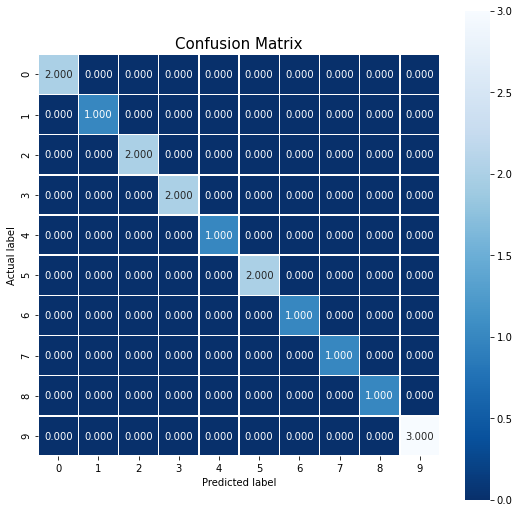

In [142]:
### Plotting the Confusion Matrix


import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

In [143]:
## TPR, TNR, FPR, FNR

tn, fp, fn, tp = confusion_matrix(target, pred, labels=[0, 1]).ravel()
print('TNR:' ,tn, 'FPR : ', fp,'FNR : ', fn, "TPR : ", tp)

TNR: 2 FPR :  0 FNR :  0 TPR :  1


In [151]:
processing_time = 10491.95 - 567.9


print('Processing time (in seconds) :', processing_time)

Processing time (in seconds) : 9924.050000000001


In [154]:
print('Training time per sample : ', 10491.95/128)
print('Testing time per sample : ', 567.9/29)

Training time per sample :  81.968359375
Testing time per sample :  19.582758620689653


In [158]:
# memoryy Profiler

import sys

print ('Memory Size : ', sys.getsizeof(model))

Memory Size :  5039677862


In [148]:
cohen_score = cohen_kappa_score(target, pred)

print ('cohen_score:',cohen_score)

cohen_score: 1.0
